# 3.1 Linear

In [1]:
from docplex.mp.model import Model
from docplex.mp.environment import Environment
import numpy as np
from random import randrange

### Import du fichier

In [2]:
def fillUntilIndex(val, ind):
    while(len(val) < int(ind)+1):
        val.append(0)

In [3]:
xdata = {}

maxCount = 400
count = 0
with open('../data_in/Amazon0302.txt','r') as file:
    for line in file:
        count = count +1
        if (count > maxCount):
            break
        a,b = line.split(" ")
        try:
            xdata[(int(a),int(b))] = randrange(5)
        except Exception as e:
            print(e)
            '''
            print(a,"/",b)
            print("line:",line)
            '''

In [4]:
max = -1
for (a,b) in xdata:
    if (a > max):
        max = a
    if (b > max):
        max = b
print(max)
#ydata = [0 for e in range(0,max+1)]
ydata = [e for e in range(0,max+1)]
'''for (a,b) in xdata:
    ydata[a] = randrange(5)
    ydata[b] = randrange(5)
'''

426


'for (a,b) in xdata:\n    ydata[a] = randrange(5)\n    ydata[b] = randrange(5)\n'

### Code

In [5]:
#(from,to,val)
V_NB = 3
E_NB = 3

V_Range = range(0,V_NB)
E_Range = range(0,E_NB)

vals = {}
vals[(0,2)] = 10
vals[(2,1)] = 20
vals[(1,0)] = 30

#valsy = [0 for e in V_Range]
valsy = [e for e in V_Range]

In [12]:
nodes = [e for e in vals]
print(nodes)

[(0, 2), (2, 1), (1, 0)]


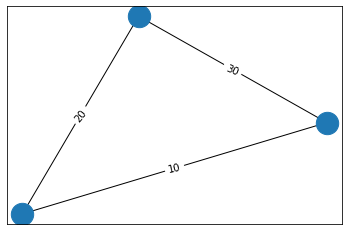

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
for v in vals:
    G.add_edges_from([v],weight=vals[v])

black_edges = [edge for edge in G.edges()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])


# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

In [7]:
#vals = xdata
#valsy = ydata

In [8]:
def a(i):
    return "y_"+i

m = Model(name='FraudGraph')
#x = m.integer_var_matrix(V_Range, E_Range, lambda ij: "x_%d_%d" %(ij[0], ij[1]))
x = m.continuous_var_dict(vals,lb=0,name='x')

#x = m.continuous_var_matrix(V_NB, E_NB, lambda ij: "x_%d_%d" %(ij[0], ij[1]))
y = m.continuous_var_list(valsy,lb=0, name='y')  #,key_format=lambda i: "x_%d" %(i[0]))

#y = m.continuous_var_list(valsy,lb=0,name="y")

c1 = m.add_constraints(x[(i,j)] <=y[i] for (i,j) in x)
c2 = m.add_constraints(x[(i,j)] <=y[j] for (i,j) in x)

#A check si pas m.sum
c3 = m.add_constraint( np.sum(y) <= 1)
#c3 = m.add_constraint( m.sum(y[i] <= 1 for i in V_Range))


#Deux condition fait par ub et lb
#c4 = m.add_constraint( y[i] >= 0 for i in V_Range)
#c5 = m.add_constraint( x[i,j] >= 0 for i in V_Range for j in E_Range)

#m.set_objective("min", 3*x)
m.maximize( m.sum(x[(i,j)] for (i,j) in x))


m.print_information()
m.solve()
m.print_solution()

Model: FraudGraph
 - number of variables: 6
   - binary=0, integer=0, continuous=6
 - number of constraints: 7
   - linear=7
 - parameters: defaults
 - objective: maximize
 - problem type is: LP
objective: 1.000
  x_0_2=0.333
  x_2_1=0.333
  x_1_0=0.333
  y_0=0.333
  y_1=0.333
  y_2=0.333


In [9]:
print(x)
print(vals)

{(0, 2): docplex.mp.Var(type=C,name='x_0_2'), (2, 1): docplex.mp.Var(type=C,name='x_2_1'), (1, 0): docplex.mp.Var(type=C,name='x_1_0')}
{(0, 2): 10, (2, 1): 20, (1, 0): 30}
